Designed as a walkthrough with this [YouTube video](https://colab.research.google.com/drive/1y0KnCFZvGVf_odSfcNAws6kcDD7HsI0L?usp=sharing)

# Tokenization :(

Tokenization is at the heart of much weirdness of LLMs. Do not brush it off.

- Why can't LLM spell words? **Tokenization**.
- Why can't LLM do super simple string processing tasks like reversing a string? **Tokenization**.
- Why is LLM worse at non-English languages (e.g. Japanese)? **Tokenization**.
- Why is LLM bad at simple arithmetic? **Tokenization**.
- Why did GPT-2 have more than necessary trouble coding in Python? **Tokenization**.
- Why did my LLM abruptly halt when it sees the string "<|endoftext|>"? **Tokenization**.
- What is this weird warning I get about a "trailing whitespace"? **Tokenization**.
- Why the LLM break if I ask it about "SolidGoldMagikarp"? **Tokenization**.
- Why should I prefer to use YAML over JSON with LLMs? **Tokenization**.
- Why is LLM not actually end-to-end language modeling? **Tokenization**.
- What is the real root of suffering? **Tokenization**.

---

Good tokenization web app: [https://tiktokenizer.vercel.app](https://tiktokenizer.vercel.app)

Example string:

```
Tokenization is at the heart of much weirdness of LLMs. Do not brush it off.

127 + 677 = 804
1275 + 6773 = 8041

Egg.
I have an Egg.
egg.
EGG.

만나서 반가워요. 저는 OpenAI에서 개발한 대규모 언어 모델인 ChatGPT입니다. 궁금한 것이 있으시면 무엇이든 물어보세요.

for i in range(1, 101):
    if i % 3 == 0 and i % 5 == 0:
        print("FizzBuzz")
    elif i % 3 == 0:
        print("Fizz")
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)
```

---

Much glory awaits someone who can delete the need for tokenization. But meanwhile, let's learn about it.


In [1]:
"안녕하세요 👋 (hello in Korean!)"

'안녕하세요 👋 (hello in Korean!)'

In [2]:
[ord(x)for x in "안녕하세요 👋 (hello in Korean!)"]

[50504,
 45397,
 54616,
 49464,
 50836,
 32,
 128075,
 32,
 40,
 104,
 101,
 108,
 108,
 111,
 32,
 105,
 110,
 32,
 75,
 111,
 114,
 101,
 97,
 110,
 33,
 41]

In [3]:
list("안녕하세요 👋 (hello in Korean!)".encode("utf-8"))

[236,
 149,
 136,
 235,
 133,
 149,
 237,
 149,
 152,
 236,
 132,
 184,
 236,
 154,
 148,
 32,
 240,
 159,
 145,
 139,
 32,
 40,
 104,
 101,
 108,
 108,
 111,
 32,
 105,
 110,
 32,
 75,
 111,
 114,
 101,
 97,
 110,
 33,
 41]

In [4]:
# text from https://www.reedbeta.com/blog/programmers-intro-to-unicode/
text = "Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception."
tokens = text.encode("utf-8")   # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience
print('---')
print(text)
print("length:", len(text))
print('---')
print(tokens)
print("length:", len(tokens))

---
Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.
length: 533
---
[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128, 140, 240, 159, 135, 174, 226, 128, 140, 240, 159, 135, 168, 226, 128, 140, 240, 159, 135, 180, 226, 128, 140

In [5]:
big_text = '''Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name still strikes fear and awe into the hearts of programmers worldwide—yes, worldwide, from Tokyo (東京) to Zürich to São Paulo to Reykjavík. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right‽). But Unicode can be abstruse, cryptic, and baffling, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.

Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ Wait—was that “Ｕｎｉｃｏｄｅ” or “Unicode” or “🅤🅝🅘🅒🅞🅓🅔?” Are these the same, or entirely different strings? Consider the plight of the developer who stares in confusion at their program’s output logs—one moment everything is fine, the next moment there’s a string of mojibake: ���. In a panic, they consult Stack Overflow—searching “my Unicode is broken 🥲 help me, please”—only to find yet another forum post telling them to “just switch to UTF-8.” Meanwhile, their boss mutters something about deadlines, legacy character sets, and the unstoppable tide of globalization.

And so they sigh, import codecs, and wonder if all this is a dreadful cosmic prank. Unicode is unstoppable, dear programmer. Unicode is unstoppable. 🅤🅝🅘🅒🅞🅓🅔 is unstoppable.

Here’s a little scenario to paint the picture more vibrantly:

The Manager: “You must support Unicode (Ｕｎｉｃｏｄｅ‽) in our system by next week!”
The Programmer: “Yes, boss, but do we mean ‘full’ Unicode, or just ASCII plus a few accented letters like á, é, î, ö, and ü?”
The Manager: “We need every single symbol on Earth—including 🍕, 🗺️, emojis of every variety, ancient Egyptian hieroglyphs, and Klingon if possible.”
The Programmer: “But why?”
The Manager: “Because globalization! Because marketing demands it!”
And so we end up with a spaghetti codebase riddled with odd casts, random utf-8 declarations, and the dreaded “double-encoding” bug.

Of course, the user tries to type some text—maybe “Ｕｎｉｃｏｄｅ is great! 🅤🅝🅘🅒🅞🅓🅔‽,” or something innocuous like “Resume for Zoë Întămplare.” The system promptly chokes. The logs show some cryptic error about “invalid multibyte sequence at position 2.” Cue the horror music.

But fear not, for we are told that the solution is simple: Just use Unicode. We should “just” adopt UTF-8 fully, store everything in a database that can handle all these code points, ensure our network layers interpret them correctly, and that’s that. Right? Possibly. But what about those JavaScript libraries that still assume strings are \u0000 to \uFFFF only? What about that weird old server that keeps defaulting to ISO-8859-1? Or that fancy language feature that requires a Byte Order Mark?

The complexities are endless. But if we survive this labyrinth, maybe we can stand tall and say, “Yes, we support Unicode! Even the bits we didn’t know existed, like U+1F648 🙈 or U+202E ‘Right-to-Left Override.’”

Now, let’s talk about these repeated words:

Ｕｎｉｃｏｄｅ: We see it again and again, in full-width glory (Ｕｎｉｃｏｄｅ!), half-width, uppercase, or stylized 🅤🅝🅘🅒🅞🅓🅔.
Programmers: Are they masochists or heroes? Possibly both. They fight the dragons of incomplete documentation to bring you that perfect Hello World in Klingon.
Fear and Awe: The unstoppable duo. Fear of mojibake, fear of code reviews, awe at the magnitude of coverage the Unicode Standard offers, awe at the unpronounceable glyphs you never knew existed.
Repeat them, relish them, saturate your logs with them. This repetition might just show you how Byte Pair Encoding lumps these tokens together. Or maybe it’ll just remind you how many ways the word “Unicode” can appear.

Let me regale you with a quick story. A friend once tried to store both “Unicode” and “Ｕｎｉｃｏｄｅ” in the same column. The system insisted they were the same string. Another system insisted they were different. Meanwhile, a third system refused to store 🅤🅝🅘🅒🅞🅓🅔 at all, complaining it was “too fancy.” And so the friend ended up with three separate code paths, each handling the same data in slightly different ways. Eventually they moved to an as-yet-unnamed exotic NoSQL database, which solved nothing but changed the error messages to “Invalid codepoint at line 23.”

By the end, the friend had run away to a remote island, rumored to be shouting “Ｕｎｉｃｏｄｅ is unstoppable!” while building a small hut out of ASCII logs.

Yes, we must amuse ourselves in the face of such adversities. After all, we love to code. That’s why we get out of bed in the morning. Or more accurately, we get out of bed, read the backlog of tickets about garbled text in user profiles, weep softly, and then drink coffee until we muster the will to begin. But let’s keep our sense of humor about it. Because once you do handle these intricacies, your codebase can greet the world with open arms:

Hello, 世界
Bonjour, le 🌍
Hola, el mundo
नमस्ते दुनिया
Привет, мир

And, of course, Ｕｎｉｃｏｄｅ and 🅤🅝🅘🅒🅞🅓🅔 and Ｕｎｉｃｏｄｅ are unstoppable.

So in summary, if you’re grappling with this unstoppable force known as Unicode—

Brace yourself for unexpected bugs.
Prepare to read a lot of documentation.
Laugh uproariously when something goes wrong (because it will).
Repeat the word “Ｕｎｉｃｏｄｅ” so often that your Byte Pair Encoding model starts merging it into a single token, merging “fear and awe” into another token, and maybe even merges “🅤🅝🅘🅒🅞🅓🅔‽” into yet another.
After all, that’s the fun of it: once you harness the power of Unicode, you can unleash a global tapestry of scripts, emojis, archaic symbols, and the entire creative potential of digital text. Sure, it’s a bit painful, but it’s also amazing. Fear and awe, dear programmer. Fear and awe.

Ｕｎｉｃｏｄｅ forever! 🅤🅝🅘🅒🅞🅓🅔 forever! Remember: “We all know we ought to support Unicode in our software.” Yes, we do. We do indeed. And so we carry on, forging a path into the wide, wild world of internationalized strings—armed with cunning, coffee, and the knowledge that the unstoppable tide of Ｕｎｉｃｏｄｅ cannot be tamed.

End of Essay'''

In [6]:
bytes(tokens).decode('utf-8')

'Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺\u200c🇳\u200c🇮\u200c🇨\u200c🇴\u200c🇩\u200c🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.'

In [7]:
ord

<function ord(c, /)>

In [8]:
def byte_pair_step_get(tokens):
    sequences = {}
    pairs_found = set()
    for i, token in enumerate(tokens):
        if token not in sequences:
            sequences[token] = [i]
        else:
            sequences[token] += [i]
    for token, ids in sequences.items():
        if len(ids) <= 1:
            continue
        pairs = {}
        pair_found = False
        for i in ids:
            if i+1 == len(tokens):
                continue
            pair = (tokens[i], tokens[i+1])
            if pair in pairs:
                pairs[pair] += 1 
                pair_found = True
            else:
                pairs[pair] = 1
        
        if pair_found:
            best_pair = sorted(pairs.items(), key=lambda x: x[1], reverse=True)[0]
        pairs_found.add(best_pair)
    
    pairs_found = sorted(list(pairs_found), key=lambda x: x[-1], reverse=True)

    return pairs_found

def byte_pair_step_set(tokens, pairs_found):
    pairs_found = [x[0] for x in pairs_found]
    max_token = max(tokens)
    pair_to_token = {}
    new_vocab = {}
    for pair in pairs_found:
        max_token+=1
        pair_to_token[pair] = max_token

    new_tokens = []
    translation = None
    for tok1, tok2 in zip(tokens, tokens[1:]):
        # skipping the second token if the translation was found in previous iteration
        # because it can't be used twice
        if translation:
            translation = None
            continue
        translation = pair_to_token.get((tok1,tok2))
        if not translation:
            new_tokens.append(tok1)
            if tok2 == tokens[-1]:
                new_tokens.append(tok2)
            continue
        # print(f'Replacing {(tok1, tok2)} with {translation}')
        new_tokens.append(translation)

    return new_tokens

# 2, 3, 5, 7, 3, 5, 2, 4

# 2,   8,  7,   8,  2, 4

pairs_found = byte_pair_step_get(tokens)
print(pairs_found)
new_tokens = byte_pair_step_set(tokens, pairs_found)
print(tokens, new_tokens, sep='\n')

[((101, 32), 20), ((240, 159), 15), ((105, 110), 12), ((226, 128), 12), ((32, 97), 10), ((97, 110), 10), ((115, 32), 10), ((116, 104), 8), ((159, 133), 7), ((114, 32), 6), ((128, 140), 6), ((111, 114), 6), ((104, 101), 6), ((140, 240), 6), ((109, 101), 6), ((110, 100), 6), ((239, 189), 6), ((117, 115), 5), ((100, 101), 5), ((44, 32), 5), ((103, 32), 4), ((99, 111), 4), ((85, 110), 4), ((46, 32), 3), ((118, 101), 3), ((108, 108), 3), ((33, 32), 2), ((107, 101), 2), ((119, 101), 2), ((102, 32), 2), ((112, 114), 2), ((121, 32), 2), ((98, 101), 2)]
[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128, 140, 240, 159, 135, 174, 226, 128, 140, 240, 159, 135, 168, 226, 128, 140, 240, 159, 135, 180, 226, 128, 140, 2

In [9]:
class Tokenizer:
    def __init__(self, text):
        self.text = text
        self.max_token = max(list(map(int, text.encode("utf-8"))))
        self.byte_tokens, self.int_tokens, self.vocabulary = self.get_vocab(text)

    def get_vocab(self, text):
        toks_b = []
        toks_i = []
        dictionary = {}
        
        for c in text:
            tok_b = c.encode("utf-8")
            tok_i = tuple(int(byte) for byte in tok_b)

            if len(tok_i) > 1:
                self.max_token += 1
                tok_i = self.max_token
            else:
                tok_i = tok_i[0]
            
            if tok_i not in dictionary:
                dictionary[tok_i] = tok_b

            toks_b.append(tok_b)
            toks_i.append(tok_i)
        
        return toks_b, toks_i, dictionary

    def byte_pair_step_get(self):
        sequences = {}
        pairs_found = set()

        for i, token in enumerate(self.int_tokens):
            if token not in sequences:
                sequences[token] = [i]
            else:
                sequences[token].append(i)

        print(sequences)

        for token, ids in sequences.items():
            if len(ids) <= 1:
                continue

            pairs = {}
            pair_found = False

            for i in ids:
                if i + 1 == len(self.int_tokens):
                    continue

                pair = (self.int_tokens[i], self.int_tokens[i + 1])
                if pair in pairs:
                    pairs[pair] += 1
                    pair_found = True
                else:
                    pairs[pair] = 1

            if pair_found:
                best_pair = sorted(pairs.items(), key=lambda x: x[1], reverse=True)[0]
                pairs_found.add(best_pair)

        if pairs_found:
            pairs_found = sorted(list(pairs_found), key=lambda x: x[-1], reverse=True)
            return pairs_found
        else:
            return None

    @staticmethod
    def print_info(func):
        def wrapper(self, *args, **kwargs):
            print(f"Vocabulary before: {self.vocabulary}")
            print(f"Length before: {len(self.int_tokens)}")
            result = func(self, *args, **kwargs)
            print(f"Vocabulary after: {self.vocabulary}")
            print(f"Length after: {len(self.int_tokens)}")
            return result
        return wrapper

    @print_info
    def byte_pair_step_set(self, pairs_found):
        pairs_found = [x[0] for x in pairs_found]
        pair_to_token = {}

        for pair in pairs_found:
            self.max_token += 1
            pair_to_token[pair] = self.max_token
        
        new_tokens = []
        i = 0

        while i < len(self.int_tokens):
            if i < len(self.int_tokens) - 1:
                tok1 = self.int_tokens[i]
                tok2 = self.int_tokens[i + 1]
                translation = pair_to_token.get((tok1, tok2))
                if translation is not None:
                    new_tokens.append(translation)
                    self.vocabulary[translation] = (
                        self.vocabulary[tok1] + self.vocabulary[tok2]
                    )
                    i += 2
                    continue

            new_tokens.append(self.int_tokens[i])
            i += 1

        self.int_tokens = new_tokens
        self.byte_tokens = [self.vocabulary[t] for t in self.int_tokens]

        return new_tokens

    def byte_pair_tokenization(self):
        pairs_found = True
        while pairs_found:
            pairs_found = self.byte_pair_step_get()
            prev_len = len(self.int_tokens)

            if pairs_found:
                self.byte_pair_step_set(pairs_found)
            
            if len(self.int_tokens) == prev_len:
                break

tokenizer = Tokenizer(big_text)
tokenizer.byte_pair_tokenization()

{241: [0], 242: [1], 243: [2], 244: [3], 245: [4], 246: [5], 247: [6], 33: [7, 31, 639, 1530, 1870, 1900, 2104, 2918, 3120, 4414, 5775, 5792], 32: [8, 17, 32, 34, 38, 43, 48, 54, 62, 67, 71, 75, 80, 84, 91, 94, 106, 121, 132, 137, 143, 148, 151, 158, 161, 165, 171, 174, 185, 188, 192, 197, 200, 206, 209, 218, 227, 230, 234, 243, 253, 258, 269, 275, 283, 287, 291, 295, 304, 313, 317, 325, 329, 332, 342, 351, 355, 365, 369, 376, 381, 385, 399, 407, 416, 421, 425, 432, 435, 449, 458, 467, 471, 477, 481, 484, 489, 494, 496, 503, 517, 519, 525, 531, 543, 547, 553, 561, 565, 571, 577, 589, 594, 597, 603, 609, 619, 640, 649, 658, 663, 673, 676, 686, 689, 700, 704, 710, 714, 720, 723, 732, 742, 751, 760, 764, 771, 774, 778, 788, 792, 799, 802, 812, 815, 821, 831, 838, 847, 854, 865, 868, 874, 878, 883, 890, 898, 900, 907, 910, 920, 925, 928, 930, 937, 942, 950, 956, 975, 979, 987, 990, 997, 999, 1004, 1008, 1021, 1024, 1029, 1033, 1041, 1047, 1052, 1060, 1065, 1068, 1074, 1081, 1084, 1092, 110

In [271]:
class Tokenizer:
    def __init__(self, verbose=0):
        self.max_token = 255
        self.verbose = verbose
        self.vocabulary = {i : chr(i) for i in range(256)}
        self.tokens = None

    def get_stats(self, text=None):
        if text:
            self.tokens = list(int(token) for token in text.encode('utf-8'))
        
        pairs = {}
        max_pair = None
        max_pair_value = 0

        for i in range(len(self.tokens)-1):
            pair = (self.tokens[i], self.tokens[i+1])
            pair_value = pairs.get(pair, 0) + 1
            pairs[pair] = pair_value

            # Keeping track of the most frequently occurring pair
            if pair_value > max_pair_value:
                max_pair = pair
                max_pair_value = pair_value
        
        return max_pair

    def merge(self, pair, text=None):
        if text:
            self.tokens = list(int(token) for token in text.encode('utf-8'))
        merged_tokens = []
        i = 0
        self.max_token+=1
        self.vocabulary[self.max_token] = self.vocabulary[pair[0]] + self.vocabulary[pair[1]]
        while i < len(self.tokens) - 1:
            
            if pair == (self.tokens[i], self.tokens[i+1]):   
                merged_tokens.append(self.max_token)
                i+=2
            else:
                merged_tokens.append(self.tokens[i])
                i+=1
        self.tokens = merged_tokens
        return merged_tokens

    def train(self, text:str, merges:int):
        if self.tokens is None:
            self.tokens = list(int(token) for token in text.encode('utf-8'))
        
        if self.verbose==1:
            len_before = len(self.tokens)
            vocab_size_before = self.max_token + 1
            print('-'*100, f'length before: {len_before}, vocab size before: {vocab_size_before}', sep='\n')

        for _ in range(merges):
            pair = self.get_stats()
            self.merge(pair)
        
        if self.verbose==1:
            len_after = len(self.tokens)
            vocab_size_after = self.max_token + 1
            print('-'*20,(f'length after: {len_after}, vocab size after: {vocab_size_after},\n' 
                  f'length decrease: {len_before-len_after}, vocab size increase: {vocab_size_after - vocab_size_before}\n'
                  f'length decrease: {len_before/len_after:.2f}x, ' 
                  f'vocab size increase: {vocab_size_after/vocab_size_before:.2f}x'), sep='\n')

        return self.tokens
    
    def decode(self, tokens:list[int]):
        output = ''
        for token in tokens:
            output+= self.vocabulary[token]
        
        return output
    
    def encode(self, text:str):
        vocabulary = self.vocabulary.copy()
        vocabulary = dict(list(vocabulary.items())[::-1])
        text_bytes = bytes(text.encode('utf-8'))
        tokens = []
        i = 0
        while i<len(text_bytes):
            for token, translation in vocabulary.items():
                if text_bytes[i:].startswith(bytes(translation.encode('utf-8'))):
                    tokens.append(token)
                    i+=len(translation)
                    break
        return tokens
                


# Tests

if __name__ == '__main__':
    # text = open('src/data/unicode_diverse.txt').read()
    
    # tokenizer = Tokenizer(verbose=1)
    # tokens = tokenizer.train(text, 700)

    # print(tokenizer.decode(tokens))
    
    text = open('data/TinyShakespeare.txt').read()
    tokenizer = Tokenizer(verbose=1)
    # tokens = tokenizer.train(text, 2000)
    
    # print(tokenizer.decode(tokens)[:1000])
    # print(tokenizer.encode(text[:1000]))



In [151]:
vocab = tokenizer.vocabulary  

In [272]:
tokenizer.vocabulary = vocab

In [273]:
bytes('Citizen'.encode('utf-8'))

b'Citizen'

In [300]:
tokens = tokenizer.encode('Citizen come to the plaza right now')

In [301]:
for tok, tr in tokenizer.vocabulary.items():
    if tok in tokens:
        print(tok, f'"{tr}"')

122 "z"
363 "the"
573 "a "
591 "e to "
864 " com"
1176 "Citizen"
1804 "right"
2013 " now"
2147 " pla"


In [143]:
tokenizer.vocabulary[1176]

'Citizen'

In [ ]:
times = []


In [ ]:
import time 
import matplotlib.pyplot as plt
text = open('data/TinyShakespeare.txt').read()
times = []
for i in range(1, 50):
    time_start = time.time()
    test_tokenizer = Tokenizer(1)
    test_tokenizer.train(text, merges=i)
    time_end = time.time()
    times.append(time_end-time_start)

----------------------------------------------------------------------------------------------------
length before: 1115394, vocab size before: 256
--------------------
length after: 687981, vocab size after: 356,
length decrease: 427413, vocab size increase: 100
length decrease: 1.62x, vocab size increase: 1.39x


In [113]:
len(times)

29

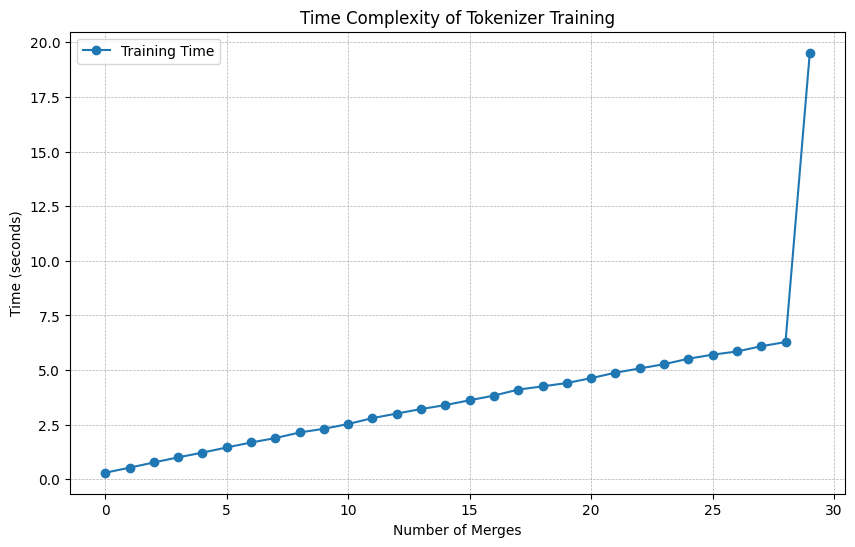

In [132]:
import matplotlib.pyplot as plt

merges = list(range(len(times)))

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(merges, times, marker='o', linestyle='-', label='Training Time')
plt.title('Time Complexity of Tokenizer Training')
plt.xlabel('Number of Merges')
plt.ylabel('Time (seconds)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


In [128]:
times.pop()

10

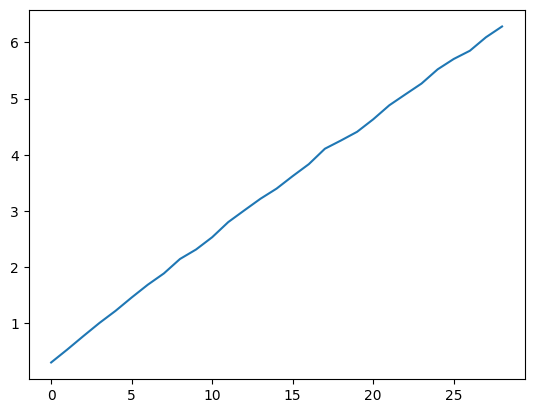

In [118]:
plt.plot(times,)

In [105]:
text

'Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺\u200c🇳\u200c🇮\u200c🇨\u200c🇴\u200c🇩\u200c🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.'

In [106]:
bytes(text.encode('utf-8')).startswith('Ｕ'.encode('utf-8'))

True

In [102]:
tokenizer = Tokenizer()
tokenizer.train(text, 100)


{355: 'ï¼µï½\x8eï½\x89ï½\x83ï½\x8fï½\x84ï½\x85! ð\x9f\x85¤ð\x9f\x85\x9dð\x9f\x85\x98ð\x9f\x85\x92ð\x9f\x85\x9eð\x9f\x85\x93ð\x9f\x85\x94â\x80½ ð\x9f\x87',
 354: 'ï¼µï½\x8eï½\x89ï½\x83ï½\x8fï½\x84ï½\x85! ð\x9f\x85¤ð\x9f\x85\x9dð\x9f\x85\x98ð\x9f\x85\x92ð\x9f\x85\x9eð\x9f\x85\x93ð\x9f\x85\x94â\x80½ ',
 353: 'ï¼µï½\x8eï½\x89ï½\x83ï½\x8fï½\x84ï½\x85! ð\x9f\x85¤ð\x9f\x85\x9dð\x9f\x85\x98ð\x9f\x85\x92ð\x9f\x85\x9eð\x9f\x85\x93ð\x9f\x85\x94â\x80½',
 352: 'ï¼µï½\x8eï½\x89ï½\x83ï½\x8fï½\x84ï½\x85! ð\x9f\x85¤ð\x9f\x85\x9dð\x9f\x85\x98ð\x9f\x85\x92ð\x9f\x85\x9eð\x9f\x85\x93ð\x9f\x85\x94â\x80',
 351: 'ï¼µï½\x8eï½\x89ï½\x83ï½\x8fï½\x84ï½\x85! ð\x9f\x85¤ð\x9f\x85\x9dð\x9f\x85\x98ð\x9f\x85\x92ð\x9f\x85\x9eð\x9f\x85\x93ð\x9f\x85\x94',
 350: 'ï¼µï½\x8eï½\x89ï½\x83ï½\x8fï½\x84ï½\x85! ð\x9f\x85¤ð\x9f\x85\x9dð\x9f\x85\x98ð\x9f\x85\x92ð\x9f\x85\x9eð\x9f\x85\x93ð\x9f\x85',
 349: 'ï¼µï½\x8eï½\x89ï½\x83ï½\x8fï½\x84ï½\x85! ð\x9f\x85¤ð\x9f\x85\x9dð\x9f\x85\x98ð\x9f\x85\x92ð\x9f\x85\x9eð\x9f\x85\x93',
 348: 'ï¼µ

In [76]:
tokenizer = Tokenizer()
tokens = list(int(i) for i in text.encode('utf-8'))
prev_vocab_size = tokenizer.max_token+1
len_before = len(tokens)
print(f'length before: {len_before}, vocab size before: {tokenizer.max_token+1}')
tokens = tokenizer.train(text, 100)
print(f'length after: {len(tokens)}, vocab size after: {tokenizer.max_token+1}, length decrease: {len_before/len(tokens):.2f}x, vocab size increase: {(tokenizer.max_token+1)/prev_vocab_size:.2f}x')

length before: 616, vocab size before: 256
length after: 256, vocab size after: 516, length decrease: 2.41x, vocab size increase: 2.02x


In [85]:
chr(list(int(i) for i in 'text'.encode('utf-8'))[0])

'x'

In [87]:
{i : chr(i) for i in range(256)}

{0: '\x00',
 1: '\x01',
 2: '\x02',
 3: '\x03',
 4: '\x04',
 5: '\x05',
 6: '\x06',
 7: '\x07',
 8: '\x08',
 9: '\t',
 10: '\n',
 11: '\x0b',
 12: '\x0c',
 13: '\r',
 14: '\x0e',
 15: '\x0f',
 16: '\x10',
 17: '\x11',
 18: '\x12',
 19: '\x13',
 20: '\x14',
 21: '\x15',
 22: '\x16',
 23: '\x17',
 24: '\x18',
 25: '\x19',
 26: '\x1a',
 27: '\x1b',
 28: '\x1c',
 29: '\x1d',
 30: '\x1e',
 31: '\x1f',
 32: ' ',
 33: '!',
 34: '"',
 35: '#',
 36: '$',
 37: '%',
 38: '&',
 39: "'",
 40: '(',
 41: ')',
 42: '*',
 43: '+',
 44: ',',
 45: '-',
 46: '.',
 47: '/',
 48: '0',
 49: '1',
 50: '2',
 51: '3',
 52: '4',
 53: '5',
 54: '6',
 55: '7',
 56: '8',
 57: '9',
 58: ':',
 59: ';',
 60: '<',
 61: '=',
 62: '>',
 63: '?',
 64: '@',
 65: 'A',
 66: 'B',
 67: 'C',
 68: 'D',
 69: 'E',
 70: 'F',
 71: 'G',
 72: 'H',
 73: 'I',
 74: 'J',
 75: 'K',
 76: 'L',
 77: 'M',
 78: 'N',
 79: 'O',
 80: 'P',
 81: 'Q',
 82: 'R',
 83: 'S',
 84: 'T',
 85: 'U',
 86: 'V',
 87: 'W',
 88: 'X',
 89: 'Y',
 90: 'Z',
 91: '[',


In [36]:
tokens

[]

In [188]:
for token, translation in list(tokenizer.vocabulary.items())[::-1]:
    print(token, translation.decode('utf-8'))    

1318 es 
1319 sel
1316 se
1313 ssa
1315 ling 
1314 existed
1312 s. 
1311 lum
1310 end
1307 ck
1309 s:


1308 ld 
1306 ext 
1305 fi
1302 crip
1301 se 
1304 lin
1303 every
1298 d, 
1292  can
1299 ta
1300 fanc
1296 mus
1294 cl
1291 some
1295 ly differe
1293 enti
1297 ame 
1277  forever! 
1274 get out of be
1283 ystem insisted they wer
1276 dr
1280 rin
1288 by
1282 ul
1286 for 
1281  text
1279 trie
1289 bug
1278 ymbol
1271 ed 
1275 must 
1285 , dear programmer
1273 Unicode is unstoppable
1272 all
1270 if 
1269 s, and the 
1287 litt
1284 cryptic
1290  The 
1268  fore
1263 once you 
1241 get out of b
1267 After all, 
1237 is unstoppable
1247 whi
1255 ystem insi
1233  and 
1258 rate 
1265 documentation
1235 ga
1230 ag
1243 d s
1262 ? Possibl
1248 s that
1266 databas
1229 la
1231 bu
1234 ca
1242 glyph
1228 ie
1239 ym
1264 
The Programmer: 
1261 tly
1246 , dear program
1256 Unicode is unsto
1251 drea
1245 globalization
1259 ters 
1232  te
1244 yet ano
1253 fin
1252 mi
1238 s, and 
1236 es, 
125

In [189]:
for token in tokenizer.byte_tokens:
    print(token.decode('utf-8'), end='')

Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name still strikes fear and awe into the hearts of programmers worldwide—yes, worldwide, from Tokyo (東京) to Zürich to São Paulo to Reykjavík. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right‽). But Unicode can be abstruse, cryptic, and baffling, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.

Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ Wait—was that “Ｕｎｉｃｏｄｅ” or “Unicode” or “🅤🅝🅘🅒🅞🅓🅔?” Are these the same, or entirely different strings? Consider the plight of the developer who stares in confusion at their program’s output logs—one moment everything is fine, the next moment there’s a string of mojibake: ���. In a panic, they consult Stack Overflow—searching “my Unicode is broken 🥲 

In [ ]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]): # Pythonic way to iterate consecutive elements
        counts[pair] = counts.get(pair, 0) + 1
    return counts

stats = get_stats(tokens)
# print(stats)
# print(sorted(((v,k) for k,v in stats.items()), reverse=True))

In [ ]:
top_pair = max(stats, key=stats.get)
top_pair

(101, 32)

In [ ]:
def merge(ids, pair, idx):
  # in the list of ints (ids), replace all consecutive occurences of pair with the new token idx
  newids = []
  i = 0
  while i < len(ids):
    # if we are not at the very last position AND the pair matches, replace it
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

print(merge([5, 6, 6, 7, 9, 1], (6, 7), 99))

tokens2 = merge(tokens, top_pair, 256)
print(tokens2)
print("length:", len(tokens2))

[5, 6, 99, 9, 1]
[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128, 140, 240, 159, 135, 174, 226, 128, 140, 240, 159, 135, 168, 226, 128, 140, 240, 159, 135, 180, 226, 128, 140, 240, 159, 135, 169, 226, 128, 140, 240, 159, 135, 170, 33, 32, 240, 159, 152, 132, 32, 84, 104, 256, 118, 101, 114, 121, 32, 110, 97, 109, 256, 115, 116, 114, 105, 107, 101, 115, 32, 102, 101, 97, 114, 32, 97, 110, 100, 32, 97, 119, 256, 105, 110, 116, 111, 32, 116, 104, 256, 104, 101, 97, 114, 116, 115, 32, 111, 102, 32, 112, 114, 111, 103, 114, 97, 109, 109, 101, 114, 115, 32, 119, 111, 114, 108, 100, 119, 105, 100, 101, 46, 32, 87, 256, 97, 108, 108, 32, 107, 110, 111, 119, 32, 119, 256, 111, 117, 103, 104, 116, 32, 116, 111, 

In [ ]:
# making the training text longer to have more representative token statistics
# text from https://www.reedbeta.com/blog/programmers-intro-to-unicode/
text = """A Programmer’s Introduction to Unicode March 3, 2017 · Coding · 22 Comments  Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺\u200c🇳\u200c🇮\u200c🇨\u200c🇴\u200c🇩\u200c🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.  A few months ago, I got interested in Unicode and decided to spend some time learning more about it in detail. In this article, I’ll give an introduction to it from a programmer’s point of view.  I’m going to focus on the character set and what’s involved in working with strings and files of Unicode text. However, in this article I’m not going to talk about fonts, text layout/shaping/rendering, or localization in detail—those are separate issues, beyond my scope (and knowledge) here.  Diversity and Inherent Complexity The Unicode Codespace Codespace Allocation Scripts Usage Frequency Encodings UTF-8 UTF-16 Combining Marks Canonical Equivalence Normalization Forms Grapheme Clusters And More… Diversity and Inherent Complexity As soon as you start to study Unicode, it becomes clear that it represents a large jump in complexity over character sets like ASCII that you may be more familiar with. It’s not just that Unicode contains a much larger number of characters, although that’s part of it. Unicode also has a great deal of internal structure, features, and special cases, making it much more than what one might expect a mere “character set” to be. We’ll see some of that later in this article.  When confronting all this complexity, especially as an engineer, it’s hard not to find oneself asking, “Why do we need all this? Is this really necessary? Couldn’t it be simplified?”  However, Unicode aims to faithfully represent the entire world’s writing systems. The Unicode Consortium’s stated goal is “enabling people around the world to use computers in any language”. And as you might imagine, the diversity of written languages is immense! To date, Unicode supports 135 different scripts, covering some 1100 languages, and there’s still a long tail of over 100 unsupported scripts, both modern and historical, which people are still working to add.  Given this enormous diversity, it’s inevitable that representing it is a complicated project. Unicode embraces that diversity, and accepts the complexity inherent in its mission to include all human writing systems. It doesn’t make a lot of trade-offs in the name of simplification, and it makes exceptions to its own rules where necessary to further its mission.  Moreover, Unicode is committed not just to supporting texts in any single language, but also to letting multiple languages coexist within one text—which introduces even more complexity.  Most programming languages have libraries available to handle the gory low-level details of text manipulation, but as a programmer, you’ll still need to know about certain Unicode features in order to know when and how to apply them. It may take some time to wrap your head around it all, but don’t be discouraged—think about the billions of people for whom your software will be more accessible through supporting text in their language. Embrace the complexity!  The Unicode Codespace Let’s start with some general orientation. The basic elements of Unicode—its “characters”, although that term isn’t quite right—are called code points. Code points are identified by number, customarily written in hexadecimal with the prefix “U+”, such as U+0041 “A” latin capital letter a or U+03B8 “θ” greek small letter theta. Each code point also has a short name, and quite a few other properties, specified in the Unicode Character Database.  The set of all possible code points is called the codespace. The Unicode codespace consists of 1,114,112 code points. However, only 128,237 of them—about 12% of the codespace—are actually assigned, to date. There’s plenty of room for growth! Unicode also reserves an additional 137,468 code points as “private use” areas, which have no standardized meaning and are available for individual applications to define for their own purposes.  Codespace Allocation To get a feel for how the codespace is laid out, it’s helpful to visualize it. Below is a map of the entire codespace, with one pixel per code point. It’s arranged in tiles for visual coherence; each small square is 16×16 = 256 code points, and each large square is a “plane” of 65,536 code points. There are 17 planes altogether.  Map of the Unicode codespace (click to zoom)  White represents unassigned space. Blue is assigned code points, green is private-use areas, and the small red area is surrogates (more about those later). As you can see, the assigned code points are distributed somewhat sparsely, but concentrated in the first three planes.  Plane 0 is also known as the “Basic Multilingual Plane”, or BMP. The BMP contains essentially all the characters needed for modern text in any script, including Latin, Cyrillic, Greek, Han (Chinese), Japanese, Korean, Arabic, Hebrew, Devanagari (Indian), and many more.  (In the past, the codespace was just the BMP and no more—Unicode was originally conceived as a straightforward 16-bit encoding, with only 65,536 code points. It was expanded to its current size in 1996. However, the vast majority of code points in modern text belong to the BMP.)  Plane 1 contains historical scripts, such as Sumerian cuneiform and Egyptian hieroglyphs, as well as emoji and various other symbols. Plane 2 contains a large block of less-common and historical Han characters. The remaining planes are empty, except for a small number of rarely-used formatting characters in Plane 14; planes 15–16 are reserved entirely for private use.  Scripts Let’s zoom in on the first three planes, since that’s where the action is:  Map of scripts in Unicode planes 0–2 (click to zoom)  This map color-codes the 135 different scripts in Unicode. You can see how Han () and Korean () take up most of the range of the BMP (the left large square). By contrast, all of the European, Middle Eastern, and South Asian scripts fit into the first row of the BMP in this diagram.  Many areas of the codespace are adapted or copied from earlier encodings. For example, the first 128 code points of Unicode are just a copy of ASCII. This has clear benefits for compatibility—it’s easy to losslessly convert texts from smaller encodings into Unicode (and the other direction too, as long as no characters outside the smaller encoding are used).  Usage Frequency One more interesting way to visualize the codespace is to look at the distribution of usage—in other words, how often each code point is actually used in real-world texts. Below is a heat map of planes 0–2 based on a large sample of text from Wikipedia and Twitter (all languages). Frequency increases from black (never seen) through red and yellow to white.  Heat map of code point usage frequency in Unicode planes 0–2 (click to zoom)  You can see that the vast majority of this text sample lies in the BMP, with only scattered usage of code points from planes 1–2. The biggest exception is emoji, which show up here as the several bright squares in the bottom row of plane 1.  Encodings We’ve seen that Unicode code points are abstractly identified by their index in the codespace, ranging from U+0000 to U+10FFFF. But how do code points get represented as bytes, in memory or in a file?  The most convenient, computer-friendliest (and programmer-friendliest) thing to do would be to just store the code point index as a 32-bit integer. This works, but it consumes 4 bytes per code point, which is sort of a lot. Using 32-bit ints for Unicode will cost you a bunch of extra storage, memory, and performance in bandwidth-bound scenarios, if you work with a lot of text.  Consequently, there are several more-compact encodings for Unicode. The 32-bit integer encoding is officially called UTF-32 (UTF = “Unicode Transformation Format”), but it’s rarely used for storage. At most, it comes up sometimes as a temporary internal representation, for examining or operating on the code points in a string.  Much more commonly, you’ll see Unicode text encoded as either UTF-8 or UTF-16. These are both variable-length encodings, made up of 8-bit or 16-bit units, respectively. In these schemes, code points with smaller index values take up fewer bytes, which saves a lot of memory for typical texts. The trade-off is that processing UTF-8/16 texts is more programmatically involved, and likely slower.  UTF-8 In UTF-8, each code point is stored using 1 to 4 bytes, based on its index value.  UTF-8 uses a system of binary prefixes, in which the high bits of each byte mark whether it’s a single byte, the beginning of a multi-byte sequence, or a continuation byte; the remaining bits, concatenated, give the code point index. This table shows how it works:  UTF-8 (binary)\tCode point (binary)\tRange 0xxxxxxx\txxxxxxx\tU+0000–U+007F 110xxxxx 10yyyyyy\txxxxxyyyyyy\tU+0080–U+07FF 1110xxxx 10yyyyyy 10zzzzzz\txxxxyyyyyyzzzzzz\tU+0800–U+FFFF 11110xxx 10yyyyyy 10zzzzzz 10wwwwww\txxxyyyyyyzzzzzzwwwwww\tU+10000–U+10FFFF A handy property of UTF-8 is that code points below 128 (ASCII characters) are encoded as single bytes, and all non-ASCII code points are encoded using sequences of bytes 128–255. This has a couple of nice consequences. First, any strings or files out there that are already in ASCII can also be interpreted as UTF-8 without any conversion. Second, lots of widely-used string programming idioms—such as null termination, or delimiters (newlines, tabs, commas, slashes, etc.)—will just work on UTF-8 strings. ASCII bytes never occur inside the encoding of non-ASCII code points, so searching byte-wise for a null terminator or a delimiter will do the right thing.  Thanks to this convenience, it’s relatively simple to extend legacy ASCII programs and APIs to handle UTF-8 strings. UTF-8 is very widely used in the Unix/Linux and Web worlds, and many programmers argue UTF-8 should be the default encoding everywhere.  However, UTF-8 isn’t a drop-in replacement for ASCII strings in all respects. For instance, code that iterates over the “characters” in a string will need to decode UTF-8 and iterate over code points (or maybe grapheme clusters—more about those later), not bytes. When you measure the “length” of a string, you’ll need to think about whether you want the length in bytes, the length in code points, the width of the text when rendered, or something else.  UTF-16 The other encoding that you’re likely to encounter is UTF-16. It uses 16-bit words, with each code point stored as either 1 or 2 words.  Like UTF-8, we can express the UTF-16 encoding rules in the form of binary prefixes:  UTF-16 (binary)\tCode point (binary)\tRange xxxxxxxxxxxxxxxx\txxxxxxxxxxxxxxxx\tU+0000–U+FFFF 110110xxxxxxxxxx 110111yyyyyyyyyy\txxxxxxxxxxyyyyyyyyyy + 0x10000\tU+10000–U+10FFFF A more common way that people talk about UTF-16 encoding, though, is in terms of code points called “surrogates”. All the code points in the range U+D800–U+DFFF—or in other words, the code points that match the binary prefixes 110110 and 110111 in the table above—are reserved specifically for UTF-16 encoding, and don’t represent any valid characters on their own. They’re only meant to occur in the 2-word encoding pattern above, which is called a “surrogate pair”. Surrogate code points are illegal in any other context! They’re not allowed in UTF-8 or UTF-32 at all.  Historically, UTF-16 is a descendant of the original, pre-1996 versions of Unicode, in which there were only 65,536 code points. The original intention was that there would be no different “encodings”; Unicode was supposed to be a straightforward 16-bit character set. Later, the codespace was expanded to make room for a long tail of less-common (but still important) Han characters, which the Unicode designers didn’t originally plan for. Surrogates were then introduced, as—to put it bluntly—a kludge, allowing 16-bit encodings to access the new code points.  Today, Javascript uses UTF-16 as its standard string representation: if you ask for the length of a string, or iterate over it, etc., the result will be in UTF-16 words, with any code points outside the BMP expressed as surrogate pairs. UTF-16 is also used by the Microsoft Win32 APIs; though Win32 supports either 8-bit or 16-bit strings, the 8-bit version unaccountably still doesn’t support UTF-8—only legacy code-page encodings, like ANSI. This leaves UTF-16 as the only way to get proper Unicode support in Windows. (Update: in Win10 version 1903, they finally added UTF-8 support to the 8-bit APIs! 😊)  By the way, UTF-16’s words can be stored either little-endian or big-endian. Unicode has no opinion on that issue, though it does encourage the convention of putting U+FEFF zero width no-break space at the top of a UTF-16 file as a byte-order mark, to disambiguate the endianness. (If the file doesn’t match the system’s endianness, the BOM will be decoded as U+FFFE, which isn’t a valid code point.)  Combining Marks In the story so far, we’ve been focusing on code points. But in Unicode, a “character” can be more complicated than just an individual code point!  Unicode includes a system for dynamically composing characters, by combining multiple code points together. This is used in various ways to gain flexibility without causing a huge combinatorial explosion in the number of code points.  In European languages, for example, this shows up in the application of diacritics to letters. Unicode supports a wide range of diacritics, including acute and grave accents, umlauts, cedillas, and many more. All these diacritics can be applied to any letter of any alphabet—and in fact, multiple diacritics can be used on a single letter.  If Unicode tried to assign a distinct code point to every possible combination of letter and diacritics, things would rapidly get out of hand. Instead, the dynamic composition system enables you to construct the character you want, by starting with a base code point (the letter) and appending additional code points, called “combining marks”, to specify the diacritics. When a text renderer sees a sequence like this in a string, it automatically stacks the diacritics over or under the base letter to create a composed character.  For example, the accented character “Á” can be expressed as a string of two code points: U+0041 “A” latin capital letter a plus U+0301 “◌́” combining acute accent. This string automatically gets rendered as a single character: “Á”.  Now, Unicode does also include many “precomposed” code points, each representing a letter with some combination of diacritics already applied, such as U+00C1 “Á” latin capital letter a with acute or U+1EC7 “ệ” latin small letter e with circumflex and dot below. I suspect these are mostly inherited from older encodings that were assimilated into Unicode, and kept around for compatibility. In practice, there are precomposed code points for most of the common letter-with-diacritic combinations in European-script languages, so they don’t use dynamic composition that much in typical text.  Still, the system of combining marks does allow for an arbitrary number of diacritics to be stacked on any base character. The reductio-ad-absurdum of this is Zalgo text, which works by ͖͟ͅr͞aṋ̫̠̖͈̗d͖̻̹óm̪͙͕̗̝ļ͇̰͓̳̫ý͓̥̟͍ ̕s̫t̫̱͕̗̰̼̘͜a̼̩͖͇̠͈̣͝c̙͍k̖̱̹͍͘i̢n̨̺̝͇͇̟͙ģ̫̮͎̻̟ͅ ̕n̼̺͈͞u̮͙m̺̭̟̗͞e̞͓̰̤͓̫r̵o̖ṷs҉̪͍̭̬̝̤ ̮͉̝̞̗̟͠d̴̟̜̱͕͚i͇̫̼̯̭̜͡ḁ͙̻̼c̲̲̹r̨̠̹̣̰̦i̱t̤̻̤͍͙̘̕i̵̜̭̤̱͎c̵s ͘o̱̲͈̙͖͇̲͢n͘ ̜͈e̬̲̠̩ac͕̺̠͉h̷̪ ̺̣͖̱ḻ̫̬̝̹ḙ̙̺͙̭͓̲t̞̞͇̲͉͍t̷͔̪͉̲̻̠͙e̦̻͈͉͇r͇̭̭̬͖,̖́ ̜͙͓̣̭s̘̘͈o̱̰̤̲ͅ ̛̬̜̙t̼̦͕̱̹͕̥h̳̲͈͝ͅa̦t̻̲ ̻̟̭̦̖t̛̰̩h̠͕̳̝̫͕e͈̤̘͖̞͘y҉̝͙ ̷͉͔̰̠o̞̰v͈͈̳̘͜er̶f̰͈͔ḻ͕̘̫̺̲o̲̭͙͠ͅw̱̳̺ ͜t̸h͇̭͕̳͍e̖̯̟̠ ͍̞̜͔̩̪͜ļ͎̪̲͚i̝̲̹̙̩̹n̨̦̩̖ḙ̼̲̼͢ͅ ̬͝s̼͚̘̞͝p͙̘̻a̙c҉͉̜̤͈̯̖i̥͡n̦̠̱͟g̸̗̻̦̭̮̟ͅ ̳̪̠͖̳̯̕a̫͜n͝d͡ ̣̦̙ͅc̪̗r̴͙̮̦̹̳e͇͚̞͔̹̫͟a̙̺̙ț͔͎̘̹ͅe̥̩͍ a͖̪̜̮͙̹n̢͉̝ ͇͉͓̦̼́a̳͖̪̤̱p̖͔͔̟͇͎͠p̱͍̺ę̲͎͈̰̲̤̫a̯͜r̨̮̫̣̘a̩̯͖n̹̦̰͎̣̞̞c̨̦̱͔͎͍͖e̬͓͘ ̤̰̩͙̤̬͙o̵̼̻̬̻͇̮̪f̴ ̡̙̭͓͖̪̤“̸͙̠̼c̳̗͜o͏̼͙͔̮r̞̫̺̞̥̬ru̺̻̯͉̭̻̯p̰̥͓̣̫̙̤͢t̳͍̳̖ͅi̶͈̝͙̼̙̹o̡͔n̙̺̹̖̩͝ͅ”̨̗͖͚̩.̯͓  A few other places where dynamic character composition shows up in Unicode:  Vowel-pointing notation in Arabic and Hebrew. In these languages, words are normally spelled with some of their vowels left out. They then have diacritic notation to indicate the vowels (used in dictionaries, language-teaching materials, children’s books, and such). These diacritics are expressed with combining marks.  A Hebrew example, with niqqud:\tאֶת דַלְתִּי הֵזִיז הֵנִיעַ, קֶטֶב לִשְׁכַּתִּי יָשׁוֹד Normal writing (no niqqud):\tאת דלתי הזיז הניע, קטב לשכתי ישוד Devanagari, the script used to write Hindi, Sanskrit, and many other South Asian languages, expresses certain vowels as combining marks attached to consonant letters. For example, “ह” + “\u200bि” = “हि” (“h” + “i” = “hi”). Korean characters stand for syllables, but they are composed of letters called jamo that stand for the vowels and consonants in the syllable. While there are code points for precomposed Korean syllables, it’s also possible to dynamically compose them by concatenating their jamo. For example, “ᄒ” + “ᅡ” + “ᆫ” = “한” (“h” + “a” + “n” = “han”). Canonical Equivalence In Unicode, precomposed characters exist alongside the dynamic composition system. A consequence of this is that there are multiple ways to express “the same” string—different sequences of code points that result in the same user-perceived characters. For example, as we saw earlier, we can express the character “Á” either as the single code point U+00C1, or as the string of two code points U+0041 U+0301.  Another source of ambiguity is the ordering of multiple diacritics in a single character. Diacritic order matters visually when two diacritics apply to the same side of the base character, e.g. both above: “ǡ” (dot, then macron) is different from “ā̇” (macron, then dot). However, when diacritics apply to different sides of the character, e.g. one above and one below, then the order doesn’t affect rendering. Moreover, a character with multiple diacritics might have one of the diacritics precomposed and others expressed as combining marks.  For example, the Vietnamese letter “ệ” can be expressed in five different ways:  Fully precomposed: U+1EC7 “ệ” Partially precomposed: U+1EB9 “ẹ” + U+0302 “◌̂” Partially precomposed: U+00EA “ê” + U+0323 “◌̣” Fully decomposed: U+0065 “e” + U+0323 “◌̣” + U+0302 “◌̂” Fully decomposed: U+0065 “e” + U+0302 “◌̂” + U+0323 “◌̣” Unicode refers to set of strings like this as “canonically equivalent”. Canonically equivalent strings are supposed to be treated as identical for purposes of searching, sorting, rendering, text selection, and so on. This has implications for how you implement operations on text. For example, if an app has a “find in file” operation and the user searches for “ệ”, it should, by default, find occurrences of any of the five versions of “ệ” above!  Normalization Forms To address the problem of “how to handle canonically equivalent strings”, Unicode defines several normalization forms: ways of converting strings into a canonical form so that they can be compared code-point-by-code-point (or byte-by-byte).  The “NFD” normalization form fully decomposes every character down to its component base and combining marks, taking apart any precomposed code points in the string. It also sorts the combining marks in each character according to their rendered position, so e.g. diacritics that go below the character come before the ones that go above the character. (It doesn’t reorder diacritics in the same rendered position, since their order matters visually, as previously mentioned.)  The “NFC” form, conversely, puts things back together into precomposed code points as much as possible. If an unusual combination of diacritics is called for, there may not be any precomposed code point for it, in which case NFC still precomposes what it can and leaves any remaining combining marks in place (again ordered by rendered position, as in NFD).  There are also forms called NFKD and NFKC. The “K” here refers to compatibility decompositions, which cover characters that are “similar” in some sense but not visually identical. However, I’m not going to cover that here.  Grapheme Clusters As we’ve seen, Unicode contains various cases where a thing that a user thinks of as a single “character” might actually be made up of multiple code points under the hood. Unicode formalizes this using the notion of a grapheme cluster: a string of one or more code points that constitute a single “user-perceived character”.  UAX #29 defines the rules for what, precisely, qualifies as a grapheme cluster. It’s approximately “a base code point followed by any number of combining marks”, but the actual definition is a bit more complicated; it accounts for things like Korean jamo, and emoji ZWJ sequences.  The main thing grapheme clusters are used for is text editing: they’re often the most sensible unit for cursor placement and text selection boundaries. Using grapheme clusters for these purposes ensures that you can’t accidentally chop off some diacritics when you copy-and-paste text, that left/right arrow keys always move the cursor by one visible character, and so on.  Another place where grapheme clusters are useful is in enforcing a string length limit—say, on a database field. While the true, underlying limit might be something like the byte length of the string in UTF-8, you wouldn’t want to enforce that by just truncating bytes. At a minimum, you’d want to “round down” to the nearest code point boundary; but even better, round down to the nearest grapheme cluster boundary. Otherwise, you might be corrupting the last character by cutting off a diacritic, or interrupting a jamo sequence or ZWJ sequence.  And More… There’s much more that could be said about Unicode from a programmer’s perspective! I haven’t gotten into such fun topics as case mapping, collation, compatibility decompositions and confusables, Unicode-aware regexes, or bidirectional text. Nor have I said anything yet about implementation issues—how to efficiently store and look-up data about the sparsely-assigned code points, or how to optimize UTF-8 decoding, string comparison, or NFC normalization. Perhaps I’ll return to some of those things in future posts.  Unicode is a fascinating and complex system. It has a many-to-one mapping between bytes and code points, and on top of that a many-to-one (or, under some circumstances, many-to-many) mapping between code points and “characters”. It has oddball special cases in every corner. But no one ever claimed that representing all written languages was going to be easy, and it’s clear that we’re never going back to the bad old days of a patchwork of incompatible encodings.  Further reading:  The Unicode Standard UTF-8 Everywhere Manifesto Dark corners of Unicode by Eevee ICU (International Components for Unicode)—C/C++/Java libraries implementing many Unicode algorithms and related things Python 3 Unicode Howto Google Noto Fonts—set of fonts intended to cover all assigned code points"""
tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience

In [ ]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

def merge(ids, pair, idx):
  newids = []
  i = 0
  while i < len(ids):
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

# ---
vocab_size = 276 # the desired final vocabulary size
num_merges = vocab_size - 256
ids = list(tokens) # copy so we don't destroy the original list

merges = {} # (int, int) -> int
for i in range(num_merges):
  stats = get_stats(ids)
  pair = max(stats, key=stats.get)
  idx = 256 + i
  print(f"merging {pair} into a new token {idx}")
  ids = merge(ids, pair, idx)
  merges[pair] = idx

merging (101, 32) into a new token 256
merging (105, 110) into a new token 257
merging (115, 32) into a new token 258
merging (116, 104) into a new token 259
merging (101, 114) into a new token 260
merging (99, 111) into a new token 261
merging (116, 32) into a new token 262
merging (226, 128) into a new token 263
merging (44, 32) into a new token 264
merging (97, 110) into a new token 265
merging (111, 114) into a new token 266
merging (100, 32) into a new token 267
merging (97, 114) into a new token 268
merging (101, 110) into a new token 269
merging (257, 103) into a new token 270
merging (261, 100) into a new token 271
merging (121, 32) into a new token 272
merging (46, 32) into a new token 273
merging (97, 108) into a new token 274
merging (259, 256) into a new token 275


In [ ]:
print("tokens length:", len(tokens))
print("ids length:", len(ids))
print(f"compression ratio: {len(tokens) / len(ids):.2f}X")

tokens length: 24597
ids length: 19438
compression ratio: 1.27X


Note, the Tokenizer is a completely separate, independent module from the LLM. It has its own training dataset of text (which could be different from that of the LLM), on which you train the vocabulary using the Byte Pair Encoding (BPE) algorithm. It then translates back and forth between raw text and sequences of tokens. The LLM later only ever sees the tokens and never directly deals with any text.

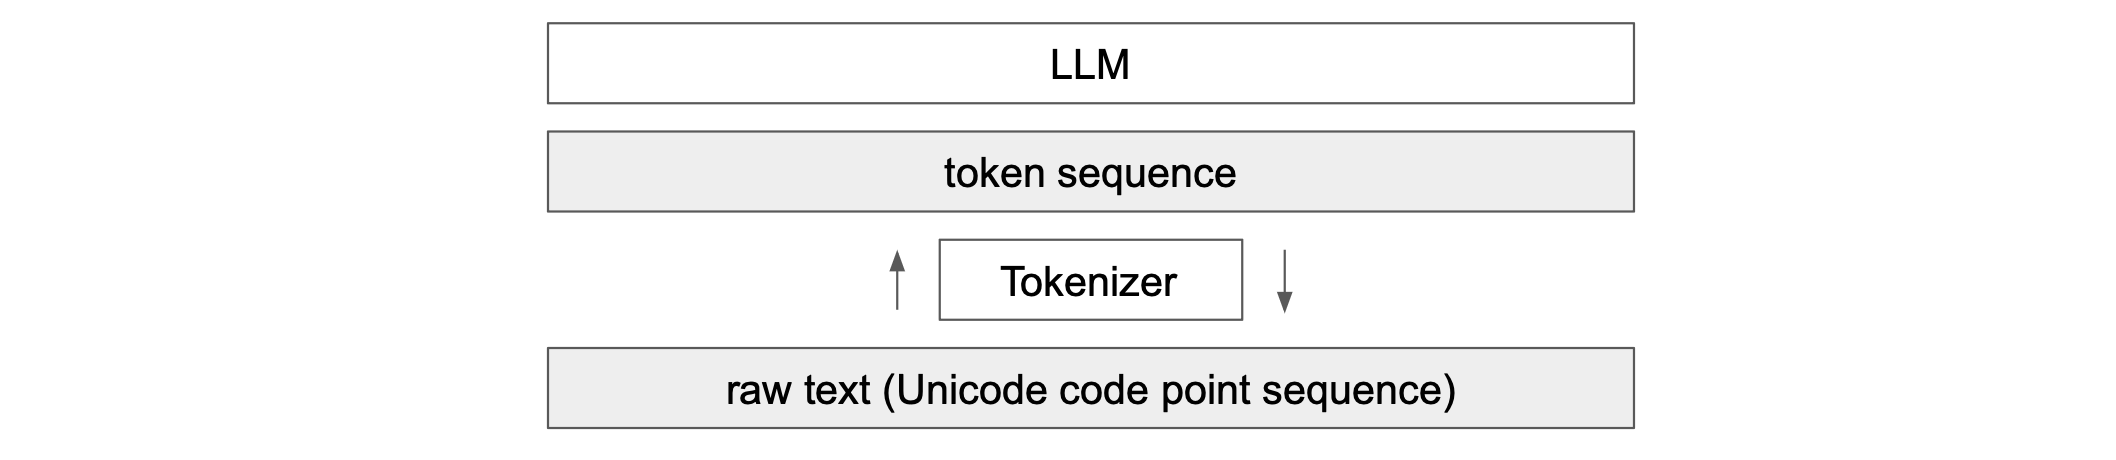

### decoding

Given a sequence of integers in the range [0, vocab_size], what is the text?


In [ ]:
vocab = {idx: bytes([idx]) for idx in range(256)}
for (p0, p1), idx in merges.items():
    vocab[idx] = vocab[p0] + vocab[p1]

def decode(ids):
  # given ids (list of integers), return Python string
  tokens = b"".join(vocab[idx] for idx in ids)
  text = tokens.decode("utf-8", errors="replace")
  return text

print(decode([128]))

�


### encoding

The other way around: Given a string, what are the tokens?


In [ ]:
merges

{(101, 32): 256,
 (105, 110): 257,
 (115, 32): 258,
 (116, 104): 259,
 (101, 114): 260,
 (99, 111): 261,
 (116, 32): 262,
 (226, 128): 263,
 (44, 32): 264,
 (97, 110): 265,
 (111, 114): 266,
 (100, 32): 267,
 (97, 114): 268,
 (101, 110): 269,
 (257, 103): 270,
 (261, 100): 271,
 (121, 32): 272,
 (46, 32): 273,
 (97, 108): 274,
 (259, 256): 275}

In [ ]:
def encode(text):
  # given a string, return list of integers (the tokens)
  tokens = list(text.encode("utf-8"))
  while len(tokens) >= 2:
    stats = get_stats(tokens)
    pair = min(stats, key=lambda p: merges.get(p, float("inf")))
    if pair not in merges:
      break # nothing else can be merged
    idx = merges[pair]
    tokens = merge(tokens, pair, idx)
  return tokens

print(encode(""))

[]


In [ ]:
print(decode(encode("hello world")))

hello world


In [ ]:
text2 = decode(encode(text))
print(text2 == text)

True


In [ ]:
valtext = "Many common characters, including numerals, punctuation, and other symbols, are unified within the standard and are not treated as specific to any given writing system. Unicode encodes thousands of emoji, with the continued development thereof conducted by the Consortium as a part of the standard.[4] Moreover, the widespread adoption of Unicode was in large part responsible for the initial popularization of emoji outside of Japan. Unicode is ultimately capable of encoding more than 1.1 million characters."
valtext2 = decode(encode(valtext))
print(valtext2 == valtext)

True


### Forced splits using regex patterns (GPT series)


In [ ]:
import regex as re
gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")

print(re.findall(gpt2pat, "Hello've world123 how's are you!!!?"))

['Hello', "'ve", ' world', '123', ' how', "'s", ' are', ' you', '!!!?']


In [ ]:
example = """
for i in range(1, 101):
    if i % 3 == 0 and i % 5 == 0:
        print("FizzBuzz")
    elif i % 3 == 0:
        print("Fizz")
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)
"""
print(re.findall(gpt2pat, example))

['\n', 'for', ' i', ' in', ' range', '(', '1', ',', ' 101', '):', '\n   ', ' if', ' i', ' %', ' 3', ' ==', ' 0', ' and', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', '("', 'FizzBuzz', '")', '\n   ', ' elif', ' i', ' %', ' 3', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Fizz', '")', '\n   ', ' elif', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Buzz', '")', '\n   ', ' else', ':', '\n       ', ' print', '(', 'i', ')', '\n']


In [ ]:
!pip install tiktoken # added for colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.


In [ ]:
import tiktoken

# GPT-2 (does not merge spaces)
enc = tiktoken.get_encoding("gpt2")
print(enc.encode("    hello world!!!"))

# GPT-4 (merges spaces)
enc = tiktoken.get_encoding("cl100k_base")
print(enc.encode("    hello world!!!"))

[220, 220, 220, 23748, 995, 10185]
[262, 24748, 1917, 12340]


Reference the GPT-2 [encoder.py](https://github.com/openai/gpt-2/blob/master/src/encoder.py)
Download the vocab.bpe and encoder.json files.

In [ ]:
!wget https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/vocab.bpe
!wget https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/encoder.json

--2024-02-20 15:57:49--  https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/vocab.bpe
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 20.60.179.33
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|20.60.179.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 456318 (446K) [application/octet-stream]
Saving to: ‘vocab.bpe’

vocab.bpe           100%[===================>] 445.62K   513KB/s    in 0.9s    

2024-02-20 15:57:51 (513 KB/s) - ‘vocab.bpe’ saved [456318/456318]

--2024-02-20 15:57:51--  https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/encoder.json
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 20.60.179.33
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|20.60.179.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1042301 (1018K) [application/json]
Saving to: ‘

In [ ]:
import os, json

with open('encoder.json', 'r') as f:
    encoder = json.load(f) # <--- ~equivalent to our "vocab"

with open('vocab.bpe', 'r', encoding="utf-8") as f:
    bpe_data = f.read()
bpe_merges = [tuple(merge_str.split()) for merge_str in bpe_data.split('\n')[1:-1]]
# ^---- ~equivalent to our "merges"


### special tokens


In [ ]:
len(encoder) # 256 raw byte tokens. 50,000 merges. +1 special token

50257

In [ ]:
encoder['<|endoftext|>'] # the only special token in use for the GPT-2 base model

50256

### minbpe exercise

At this point you have everything you need to build your own GPT-4 tokenizer. This is the [exercise progression](https://github.com/karpathy/minbpe/blob/master/exercise.md) you may wish to follow. You'll note that it is part of the [minbpe](https://github.com/karpathy/minbpe) repo, which is the solution to that exercise, and is a cleaned up version of the code above.

In [ ]:
import tiktoken
enc = tiktoken.get_encoding("cl100k_base") # GPT-4 tokenizer
print(enc.encode("안녕하세요 👋 (hello in Korean!)"))
print(enc.decode(enc.encode("안녕하세요 👋 (hello in Korean!)")) == "안녕하세요 👋 (hello in Korean!)")
# match the above for your own tokenizer, and also implement a train() function

[31495, 230, 75265, 243, 92245, 62904, 233, 320, 15339, 304, 16526, 16715]
True


### sentencepiece

Commonly used because (unlike tiktoken) it can efficiently both train and inference BPE tokenizers. It is used in both Llama and Mistral series.

[sentencepiece on Github link](https://github.com/google/sentencepiece).

**The big difference**: sentencepiece runs BPE on the Unicode code points directly! It then has an option `character_coverage` for what to do with very very rare codepoints that appear very few times, and it either maps them onto an UNK token, or if `byte_fallback` is turned on, it encodes them with utf-8 and then encodes the raw bytes instead.

TLDR:

- tiktoken encodes to utf-8 and then BPEs bytes
- sentencepiece BPEs the code points and optionally falls back to utf-8 bytes for rare code points (rarity is determined by character_coverage hyperparameter), which then get translated to byte tokens.

(Personally I think the tiktoken way is a lot cleaner...)

In [ ]:
import sentencepiece as spm

In [ ]:
# write a toy.txt file with some random text
with open("toy.txt", "w", encoding="utf-8") as f:
  f.write("SentencePiece is an unsupervised text tokenizer and detokenizer mainly for Neural Network-based text generation systems where the vocabulary size is predetermined prior to the neural model training. SentencePiece implements subword units (e.g., byte-pair-encoding (BPE) [Sennrich et al.]) and unigram language model [Kudo.]) with the extension of direct training from raw sentences. SentencePiece allows us to make a purely end-to-end system that does not depend on language-specific pre/postprocessing.")

Docs for sentencepiece options:

- [markdown](https://github.com/google/sentencepiece/blob/master/doc/options.md)
- [protobuf](https://github.com/google/sentencepiece/blob/master/src/sentencepiece_model.proto#L193)

In [ ]:
# train a sentencepiece model on it
# the settings here are (best effort) those used for training Llama 2
import os

options = dict(
  # input spec
  input="toy.txt",
  input_format="text",
  # output spec
  model_prefix="tok400", # output filename prefix
  # algorithm spec
  # BPE alg
  model_type="bpe",
  vocab_size=400,
  # normalization
  normalization_rule_name="identity", # ew, turn off normalization
  remove_extra_whitespaces=False,
  input_sentence_size=200000000, # max number of training sentences
  max_sentence_length=4192, # max number of bytes per sentence
  seed_sentencepiece_size=1000000,
  shuffle_input_sentence=True,
  # rare word treatment
  character_coverage=0.99995,
  byte_fallback=True,
  # merge rules
  split_digits=True,
  split_by_unicode_script=True,
  split_by_whitespace=True,
  split_by_number=True,
  max_sentencepiece_length=16,
  add_dummy_prefix=True,
  allow_whitespace_only_pieces=True,
  # special tokens
  unk_id=0, # the UNK token MUST exist
  bos_id=1, # the others are optional, set to -1 to turn off
  eos_id=2,
  pad_id=-1,
  # systems
  num_threads=os.cpu_count(), # use ~all system resources
)

spm.SentencePieceTrainer.train(**options)


In [ ]:
sp = spm.SentencePieceProcessor()
sp.load('tok400.model')
vocab = [[sp.id_to_piece(idx), idx] for idx in range(sp.get_piece_size())]
vocab

[['<unk>', 0],
 ['<s>', 1],
 ['</s>', 2],
 ['<0x00>', 3],
 ['<0x01>', 4],
 ['<0x02>', 5],
 ['<0x03>', 6],
 ['<0x04>', 7],
 ['<0x05>', 8],
 ['<0x06>', 9],
 ['<0x07>', 10],
 ['<0x08>', 11],
 ['<0x09>', 12],
 ['<0x0A>', 13],
 ['<0x0B>', 14],
 ['<0x0C>', 15],
 ['<0x0D>', 16],
 ['<0x0E>', 17],
 ['<0x0F>', 18],
 ['<0x10>', 19],
 ['<0x11>', 20],
 ['<0x12>', 21],
 ['<0x13>', 22],
 ['<0x14>', 23],
 ['<0x15>', 24],
 ['<0x16>', 25],
 ['<0x17>', 26],
 ['<0x18>', 27],
 ['<0x19>', 28],
 ['<0x1A>', 29],
 ['<0x1B>', 30],
 ['<0x1C>', 31],
 ['<0x1D>', 32],
 ['<0x1E>', 33],
 ['<0x1F>', 34],
 ['<0x20>', 35],
 ['<0x21>', 36],
 ['<0x22>', 37],
 ['<0x23>', 38],
 ['<0x24>', 39],
 ['<0x25>', 40],
 ['<0x26>', 41],
 ['<0x27>', 42],
 ['<0x28>', 43],
 ['<0x29>', 44],
 ['<0x2A>', 45],
 ['<0x2B>', 46],
 ['<0x2C>', 47],
 ['<0x2D>', 48],
 ['<0x2E>', 49],
 ['<0x2F>', 50],
 ['<0x30>', 51],
 ['<0x31>', 52],
 ['<0x32>', 53],
 ['<0x33>', 54],
 ['<0x34>', 55],
 ['<0x35>', 56],
 ['<0x36>', 57],
 ['<0x37>', 58],
 ['<0x38>', 5

In [ ]:
ids = sp.encode("hello 안녕하세요")
print(ids)

[362, 378, 361, 372, 358, 362, 239, 152, 139, 238, 136, 152, 240, 152, 155, 239, 135, 187, 239, 157, 151]


In [ ]:
print([sp.id_to_piece(idx) for idx in ids])

['▁', 'h', 'e', 'l', 'lo', '▁', '<0xEC>', '<0x95>', '<0x88>', '<0xEB>', '<0x85>', '<0x95>', '<0xED>', '<0x95>', '<0x98>', '<0xEC>', '<0x84>', '<0xB8>', '<0xEC>', '<0x9A>', '<0x94>']


**Llama 2 tokenizer proto**
If you'd like to export the raw protocol buffer for the `tokenizer.model` released by meta, this is a [helpful issue](https://github.com/google/sentencepiece/issues/121). And this is the result:

```
normalizer_spec {
  name: "identity"
  precompiled_charsmap: ""
  add_dummy_prefix: true
  remove_extra_whitespaces: false
  normalization_rule_tsv: ""
}

trainer_spec {
  input: "/large_experiments/theorem/datasets/MERGED/all.test1.merged"
  model_prefix: "spm_model_32k_200M_charcov099995_allowWSO__v2"
  model_type: BPE
  vocab_size: 32000
  self_test_sample_size: 0
  input_format: "text"
  character_coverage: 0.99995
  input_sentence_size: 200000000
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  num_threads: 80
  num_sub_iterations: 2
  max_sentence_length: 4192
  shuffle_input_sentence: true
  max_sentencepiece_length: 16
  split_by_unicode_script: true
  split_by_whitespace: true
  split_by_number: true
  treat_whitespace_as_suffix: false
  split_digits: true
  allow_whitespace_only_pieces: true
  vocabulary_output_piece_score: true
  hard_vocab_limit: true
  use_all_vocab: false
  byte_fallback: true
  required_chars: ""
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_surface: " \342\201\207 "
  unk_piece: "<unk>"
  bos_piece: "<s>"
  eos_piece: "</s>"
  pad_piece: "<pad>"
  train_extremely_large_corpus: false
  enable_differential_privacy: false
  differential_privacy_noise_level: 0.0
  differential_privacy_clipping_threshold: 0
}
```

#### vocab_size

- Q: what should be vocab size?
- Q: how can I increase vocab size?
- A: let's see. Reminder: [gpt.py](https://github.com/karpathy/ng-video-lecture/blob/master/gpt.py) from before.

### Final recommendations

- Don't brush off tokenization. A lot of footguns and sharp edges here. Security issues. Safety issues.
- Eternal glory to anyone who can delete tokenization as a required step in LLMs.
- In your own application:
  - Maybe you can just re-use the GPT-4 tokens and tiktoken?
  - If you're training a vocab, ok to use BPE with sentencepiece. Careful with the million settings.
  - Switch to minbpe once it is as efficient as sentencepiece :)


### Also worth looking at

- [Huggingface Tokenizer](https://huggingface.co/docs/transformers/main_classes/tokenizer). I didn't cover it in detail in the lecture because the algorithm (to my knowledge) is very similar to sentencepiece, but worth potentially evaluating for use in practice.